In [2]:
#Importing packages
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd

In [3]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from numpy.random import normal, uniform


In [4]:
#creating the model based on feature matrix and optimal beta coeficients
def betaAndYtildeGenerator(X_train,y_train):
    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
    ytilde = X_train @ beta
    return beta,ytilde


In [5]:
#Setting up the Feature matrix
def X_generator(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)  # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X


In [6]:
# split in training and test data
def traningDataGenerator(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 11)
    return X_train, X_test, y_train, y_test

In [21]:
#Functions for R2 and MSE
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

In [8]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [9]:
#Function for generating noise
def noiseGeneration(z_input, scaling = 1):
    np.random.seed(5)
    nosyZ= z_input + np.random.randn(*z_input.shape) * scaling
    return nosyZ

In [10]:
#Fuction for making x and y of given size
def makeData(n_size=20):
    x = np.linspace(0,1,n_size)
    y = np.linspace(0,1,n_size)
    return x,y

In [11]:
#Scaling function for the feature matrix
def scale(X_train,X_test,y_train,y_test):
    scaler = StandardScaler()
    scaler_x = scaler.fit(X_train) # Scaling x-data
    X_train_scaled = scaler_x.transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    
    scaler_y = scaler.fit(y_train.reshape(-1,1))
    y_train_scaled = scaler_y.transform(y_train.reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.reshape(-1,1)).ravel()
    return X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled

In [12]:
#Ridge and lasso as a function of lambda, finding best lambda value given a polynomial
def RidgeAndLasso(X_train_local,z_train_local,X_test_local,z_test_local,numOfPoly_max):

    poly_degree = int((numOfPoly_max+1)*(numOfPoly_max+2)/2)
    numberOfLambdas = 100 #number of lamdas
    lambdas = np.logspace(-4, 4, numberOfLambdas)
    MSERidgePredict = np.zeros(numberOfLambdas)
    MSELassoPredict = np.zeros(numberOfLambdas)
    I = np.eye(poly_degree,poly_degree) #need to fix dimensions
    if poly>0:
        I = np.eye(poly_degree-1,poly_degree-1) #need to fix dimensions
    RidgeBestLambdaIndex = 0 #default value
    LassoBestLambdaIndex = 0 #default value
    for i in range(numberOfLambdas):
        lmb = lambdas[i]
        Ridge_beta = np.linalg.pinv(X_train_local.T @ X_train_local + lmb*I) @ X_train_local.T @ z_train_local
        z_intercept = np.mean(z_train_local,axis = 0)
        # and then make the prediction
        ypredictRidge = X_test_local @ Ridge_beta + z_intercept
        MSERidgePredict[i] = MSE(z_test_local,ypredictRidge)
        RegLasso = linear_model.Lasso(lmb,max_iter=1e5, tol=0.1,fit_intercept=True)
        RegLasso.fit(X_train_local,z_train_local)
        ypredictLasso = RegLasso.predict(X_test_local)
        MSELassoPredict[i] = MSE(z_test_local,ypredictLasso)
        if i==0:
            RidgeBestLambdaIndex = 0
            LassoBestLambdaIndex = 0

        else :
            if MSERidgePredict[i] < MSERidgePredict[RidgeBestLambdaIndex] :
                RidgeBestLambdaIndex = i
            if MSELassoPredict[i] < MSELassoPredict[LassoBestLambdaIndex] :
                LassoBestLambdaIndex = i
    return lambdas[LassoBestLambdaIndex], lambdas[RidgeBestLambdaIndex]#, MSERidgePredict, MSELassoPredict

# Defining the Data, using 100 points in picksels instead of 100 due to lack of computer power and optimal coding

In [14]:
def plot_z(z,title):
    plt.figure()
    plt.title('{}'.format(title))
    plt.imshow(z, cmap='winter')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

(3601, 1801)


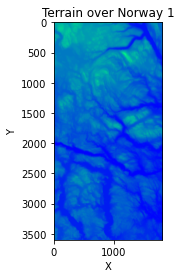

In [114]:



# Load the terrain
terrain = imread('SRTM_data_Norway_1.tif')
print(np.shape(terrain))

# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain, cmap='winter')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

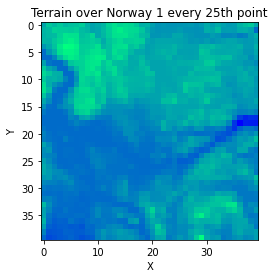

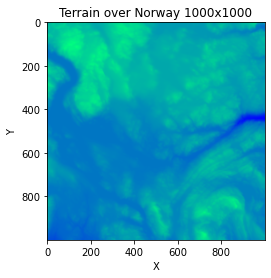

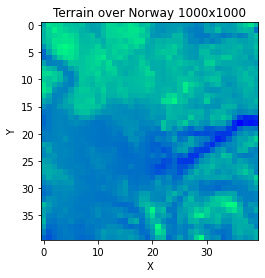

In [25]:
#plotting 1000 piczel points
terrain = imread('SRTM_data_Norway_1.tif')

N = 1000
n = 25


# Selecting 1000X1000 from the terrain file
terrain2 = terrain[:N,:N]
z = terrain2[::n, ::n] #Pick every (25th) point in terrain2
scaler =  StandardScaler()
z_scaled_mesh = scaler.fit_transform(z)

# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1 every 25th point')
plt.imshow(z, cmap='winter')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.figure()
plt.title('Terrain over Norway 1000x1000')
plt.imshow(terrain2, cmap='winter')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.figure()
plt.title('Terrain over Norway 1000x1000')
plt.imshow(z_scaled, cmap='winter')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

40
40


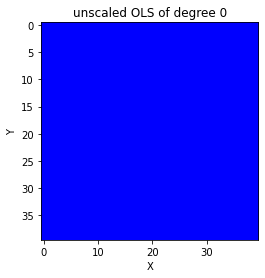

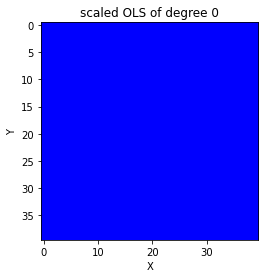

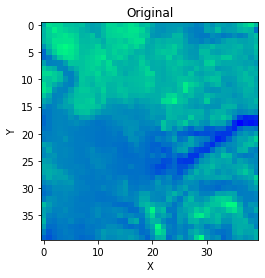

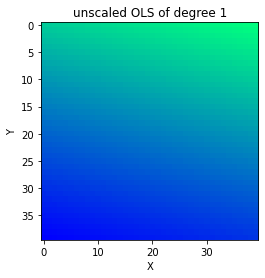

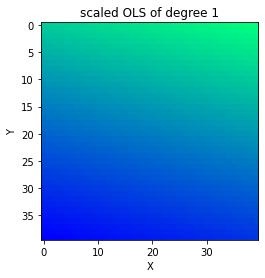

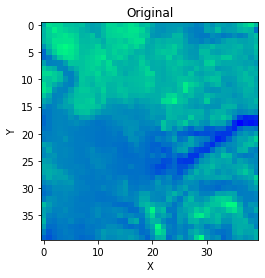

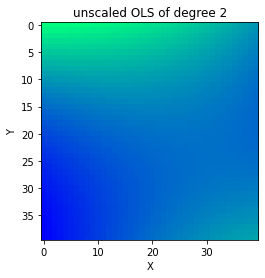

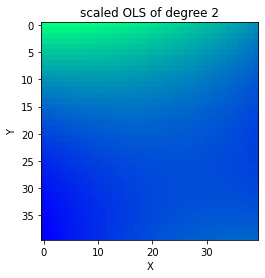

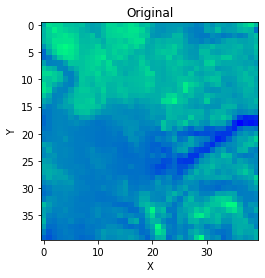

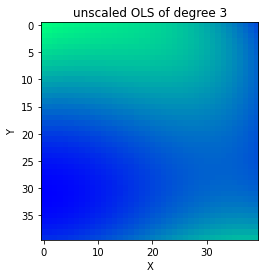

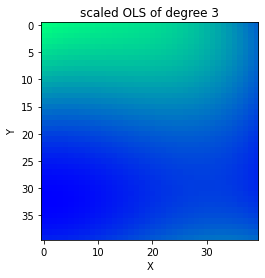

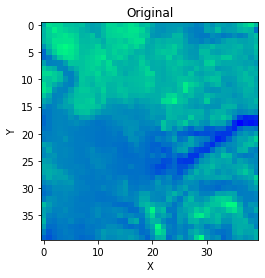

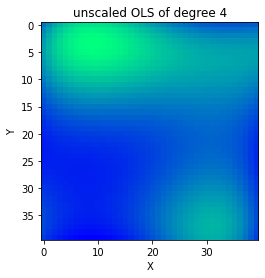

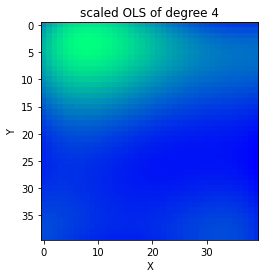

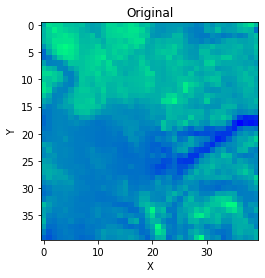

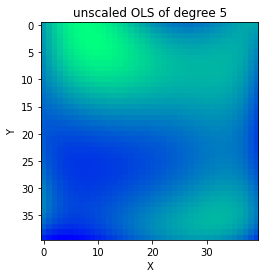

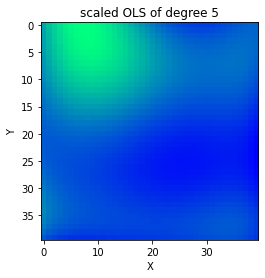

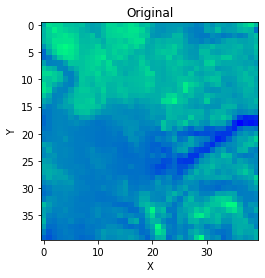

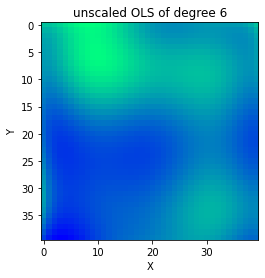

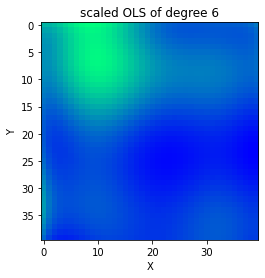

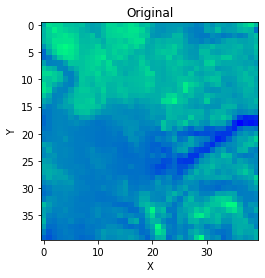

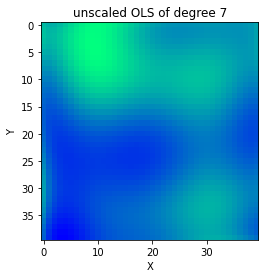

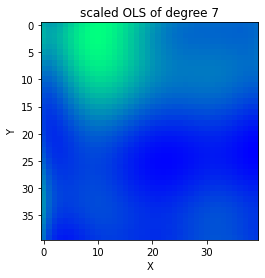

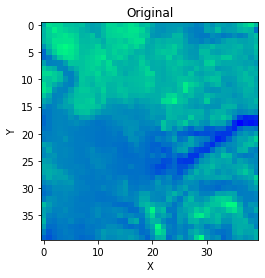

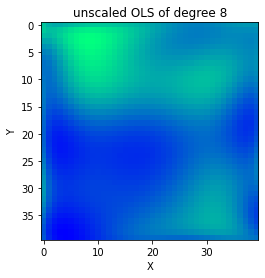

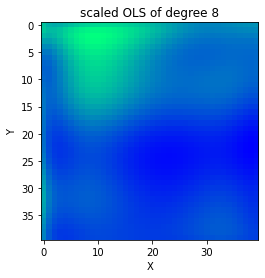

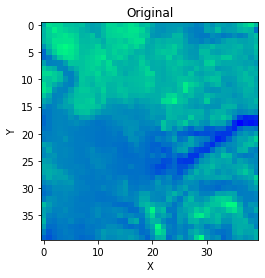

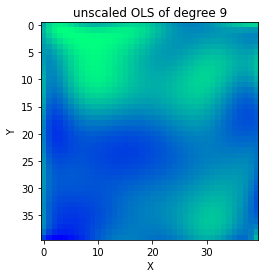

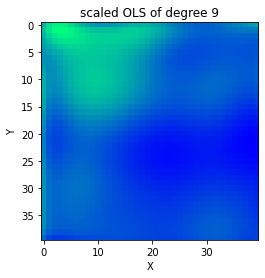

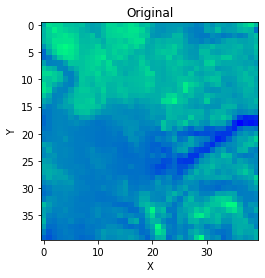

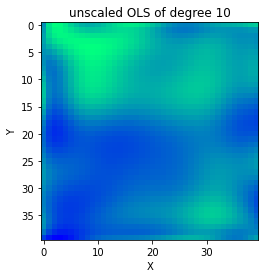

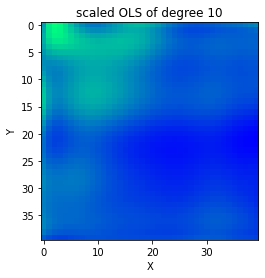

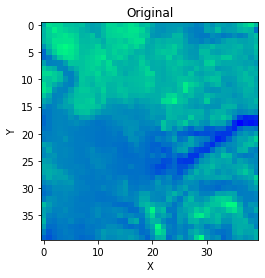

Test MSE of degree 10: 
 6329.048158723825
Test MSE_scaled of degree 10: 
 0.29227845422907384
11


In [26]:
np.random.seed(870)


z_mesh = terrain2[::n,::n] #Pick every Nth(25) point in terrain
x = np.linspace(0, 1, len(z_mesh[0,:]))
print(len(x))
y = np.linspace(0, 1, len(z_mesh[:,0]))
print(len(y))
x_mesh, y_mesh = np.meshgrid(x,y)
z = z_mesh.ravel()

plot_out = True #change this to not show the plots of the regression image
print_out = False # Change this to get print out for every itteration

#creating lists
R2_test = []
R2_train = []
R2_test_scaled = []
R2_train_scaled = []
MSE_test = []
MSE_train = []
MSE_test_scaled = []
MSE_train_scaled = []
numOfPoly_index = []
beta_index = []
beta_index_scaled = []
numOfPoly_max = 10
#for loop for number of polynomials
for i in range(numOfPoly_max +1 ):
    numOfPoly = i 
    poly = i
    X = X_generator(x_mesh,y_mesh, numOfPoly)
    Xs = X_generator(x_mesh,y_mesh, numOfPoly)
    if i > 0:
        Xs = np.delete(Xs,0,1)
        
        
    X_train, X_test, z_train, z_test = traningDataGenerator(X,z)
    X_train_s, X_test_s, z_train_s, z_test_s = traningDataGenerator(Xs,z)
    X_offset = np.mean(X_train,axis=0)
    z_offset = np.mean(z_train,axis=0)
    
    #scaling the data
    X_train_scaled, X_test_scaled, z_train_scaled, z_test_scaled = scale(X_train_s, X_test_s ,z_train_s, z_test_s)
    X_offset_scaled = np.mean(X_train_scaled,axis=0)
    z_offset_scaled = np.mean(z_train_scaled,axis=0)
    # matrix inversion to find beta
    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
    intercept = np.mean(z_offset - X_offset @ beta)
    beta_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ z_train_scaled #scaled
    intercept_scaled = np.mean(z_offset_scaled - X_offset_scaled @ beta_scaled)
    
    # and then make the prediction
    
    ztilde = X_train @ beta 
    ztilde_scaled = X_train_scaled @ beta_scaled + z_offset_scaled #scaled
    zpredict = X_test @ beta 
    zpredict_scaled = X_test_scaled @ beta_scaled + z_offset_scaled  #scaled
    
    R2_test.append(R2(z_test,zpredict))
    R2_test_scaled.append(R2(z_test_scaled,zpredict_scaled)) #scaled
    
    R2_train.append(R2(z_train,ztilde))
    R2_train_scaled.append(R2(z_train_scaled,ztilde_scaled)) #scaled
    
    MSE_train.append(MSE(z_train,ztilde))
    MSE_train_scaled.append(MSE(z_train_scaled,ztilde_scaled)) #scaled
    
    MSE_test.append(MSE(z_test,zpredict))
    MSE_test_scaled.append(MSE(z_test_scaled,zpredict_scaled)) #scaled
    
    numOfPoly_index.append(numOfPoly)
    beta_index.append(beta)
    beta_index_scaled.append(beta_scaled) #scaled
     

        
    #Printing each itteration
    if (print_out == True):
        print("degree : {}".format(poly))
        print("Training R2 of degree {}: \n".format(numOfPoly),R2(z_train,ztilde))
        print("Training MSE of degree {}: \n".format(numOfPoly),MSE(z_train,ztilde))
        print("Test R2 of degree {}: \n".format(numOfPoly),R2(z_test,zpredict))
        print("Test MSE of degree {}: \n".format(numOfPoly),MSE(z_test,zpredict))
        print("Training R2_scaled of degree {}: \n".format(numOfPoly),MSE(z_train_scaled,ztilde_scaled))
        print("Test MSE_scaled of degree {}: \n".format(numOfPoly),MSE(z_test_scaled,zpredict_scaled))
        print("Training MSE_scaled of degree {}: \n".format(numOfPoly),MSE(z_train_scaled,ztilde_scaled))
        print("Test MSE_scaled of degree {}: \n".format(numOfPoly),MSE(z_test_scaled,zpredict_scaled))
    
    if plot_out ==True:
        z_plot_unscaled = X @ beta
        z_plot_scaled = Xs @ beta_scaled + intercept_scaled
        z_plot_unscaled = z_plot_unscaled.reshape(z_mesh.shape)
        z_plot_scaled = z_plot_scaled.reshape(z_mesh.shape)
        plot_z(z_plot_unscaled,"unscaled OLS of degree {}".format(i))
        plot_z(z_plot_scaled,"scaled OLS of degree {}".format(i))
        plot_z(z_scaled_mesh,"Original")
    
    
 



print("Test MSE of degree {}: \n".format(numOfPoly),MSE(z_test,zpredict))
print("Test MSE_scaled of degree {}: \n".format(numOfPoly),MSE(z_test_scaled,zpredict_scaled))

print(len(numOfPoly_index))

<Figure size 720x432 with 0 Axes>

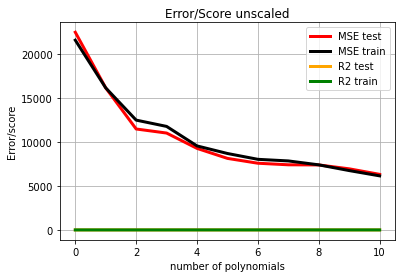

In [20]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.set_xlabel('number of polynomials')
ax.set_ylabel('Error/score',color ="black")
ax.plot(numOfPoly_index,MSE_test ,  label='MSE test',linewidth=3.0, c= "red")
ax.plot(numOfPoly_index,MSE_train ,label="MSE train",linewidth=3.0, c= "black")
ax.plot(numOfPoly_index,R2_test ,  label='R2 test',linewidth=3.0, c= "orange")
ax.plot(numOfPoly_index,R2_train ,label="R2 train",linewidth=3.0, c= "green")
plt.title("Error/Score unscaled")
plt.grid()

leg = ax.legend();

<Figure size 720x432 with 0 Axes>

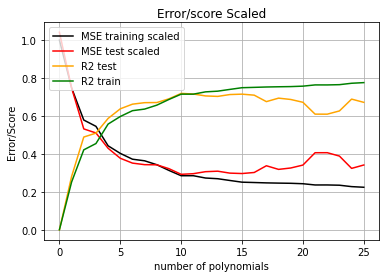

In [176]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.set_xlabel('number of polynomials')
ax.set_ylabel('Error/Score',color ="black")
ax.plot(numOfPoly_index,MSE_train_scaled ,  label='MSE training scaled', c= "black")
ax.plot(numOfPoly_index,MSE_test_scaled ,label="MSE test scaled", c= "red")
ax.plot(numOfPoly_index,R2_test_scaled ,  label='R2 test', c= "orange")
ax.plot(numOfPoly_index,R2_train_scaled ,label="R2 train", c= "green")
ax.set_title('Error/score Scaled')
plt.grid()

leg = ax.legend();

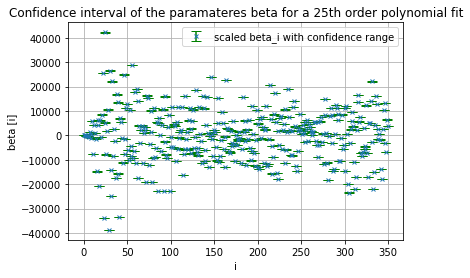

In [177]:
#_PH_unscaled = len(beta) 
_PH_scaled = len(beta_scaled) 
variance_s = np.zeros(_PH_scaled +1)
CI_s = np.zeros(_PH_scaled +1)
#variance = np.zeros(_PH_unscaled)
#CI = np.zeros(_PH_unscaled )

for i in range(_PH_scaled ):
    #variance[i] = 0.1**2 * np.linalg.pinv(X_train.T @ X_train)[i,i]
    #CI[i] = 2*np.sqrt(variance[i])/np.sqrt(N)
    variance_s[i] = 0.1**2 * np.linalg.pinv(X_train_scaled.T @ X_train_scaled)[i,i]
    CI_s[i] = 2*np.sqrt(variance_s[i])/np.sqrt(N)

print("")
#plt.errorbar(np.arange(0,_PH_unscaled), beta, yerr=CI, fmt='o', ecolor='red', capsize=5, markersize=4, label='unscaled beta_i with confidence range')
plt.errorbar(np.arange(0,_PH_scaled + 1),np.insert(beta_scaled,0,intercept_scaled), yerr=CI_s, fmt='x', ecolor='green', capsize=5, markersize=4, label='scaled beta_i with confidence range')
plt.xlabel('i')
plt.ylabel('beta [i]')
plt.grid()
plt.legend()
plt.title("Confidence interval of the paramateres beta for a 25th order polynomial fit")
plt.show()

# ignore the code under, poor atempt to validate beta.

40
40


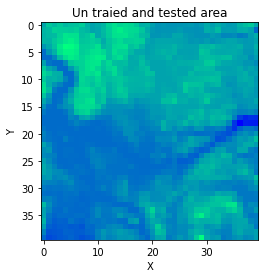

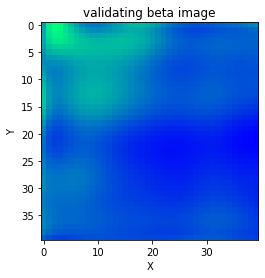

In [186]:
np.random.seed(870)

z = terrain2[::n,::n] #Pick every Nth(25) point in terrain
x = np.linspace(0, 1, len(z[0,:]))
print(len(x))
y = np.linspace(0, 1, len(z[:,0]))
print(len(y))
x_mesh, y_mesh = np.meshgrid(x,y)

X = X_generator(x_mesh,y_mesh,10)
X = np.delete(X,0,1)

z_trying = X @ beta_scaled + intercept_scaled

z_trying = z_trying.reshape(z.shape)
#z_trying = scaler.fit_transform(z_trying)

plt.figure()
plt.title('Un traied and tested area')
plt.imshow(z, cmap='winter')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.figure()
plt.title('validating beta image')
plt.imshow(z_trying, cmap='winter')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


What is your desired polynomial max degree?:25
Degree: 0   mse train: 1.000000   mse test: 1.041745
Degree: 1   mse train: 0.748406   mse test: 0.748420
Degree: 2   mse train: 0.578632   mse test: 0.531853
Degree: 3   mse train: 0.545453   mse test: 0.510464
Degree: 4   mse train: 0.442657   mse test: 0.429585
Degree: 5   mse train: 0.402728   mse test: 0.376939
Degree: 6   mse train: 0.372030   mse test: 0.351402
Degree: 7   mse train: 0.363562   mse test: 0.343185
Degree: 8   mse train: 0.342877   mse test: 0.342433
Degree: 9   mse train: 0.312696   mse test: 0.321959
Degree: 10   mse train: 0.284832   mse test: 0.292209
Degree: 11   mse train: 0.284888   mse test: 0.295609
Degree: 12   mse train: 0.272761   mse test: 0.306239
Degree: 13   mse train: 0.269025   mse test: 0.308977
Degree: 14   mse train: 0.259766   mse test: 0.298606
Degree: 15   mse train: 0.250776   mse test: 0.296389
Degree: 16   mse train: 0.249000   mse test: 0.302017
Degree: 17   mse train: 0.247078   mse test: 

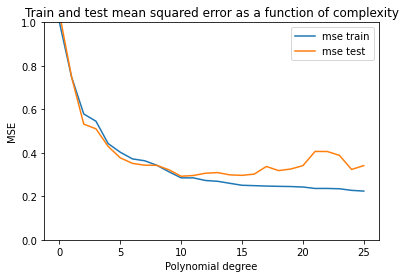

In [118]:

z = terrain2[::n, ::n] #Pick every Nth(25) point in terrain2 the 1000X1000 mesh
x = np.linspace(0, 1, len(z[0]))
y = np.linspace(0, 1, len(z[:,0]))
x_mesh, y_mesh = np.meshgrid(x,y)
z = z.ravel()

numOfPoly_index = []
beta_index = []
numOfPoly_max = input("What is your desired polynomial max degree?:")
numOfPoly_max = int(numOfPoly_max) 

MSE_test = np.zeros(numOfPoly_max + 1 )
MSE_train = np.zeros(numOfPoly_max + 1)

#for loop for number of polynomials
for poly in range(numOfPoly_max +1):
    
    
    X = X_generator(x_mesh,y_mesh, poly)

    

    X_train, X_test, z_train, z_test = traningDataGenerator(X,z)
    if poly>0:
        X = np.delete(X,0,1)
    X_train, X_test, z_train, z_test = scale(X_train, X_test,z_train,z_test)
        #X_train[:,0] = X_train[:,0] +1 #do this to fix intercept
        #X_test[:,0] = X_test[:,0] +1 #do this to fit intercept
        

    
    # matrix inversion to find beta
    z_offset = np.mean(z_train,axis = 0)
    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train

    # and then make the prediction
    ytilde = X_train @ beta + z_offset

    ypredict = X_test @ beta + z_offset
    

    R2_test.append(R2(z_test,ypredict))

    R2_train.append(R2(z_train,ytilde))

    MSE_train[poly] = MSE(z_train,ytilde)

    MSE_test[poly] = MSE(z_test,ypredict)

    numOfPoly_index.append(poly)
    beta_index.append(beta)

    #Printing each itteration
    print('Degree: %i   mse train: %.6f   mse test: %.6f'\
        %(poly, MSE_train[poly], MSE_test[poly]))
    
plt.plot(numOfPoly_index, MSE_train, label='mse train')
plt.plot(numOfPoly_index, MSE_test, label='mse test')

plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.ylim(0,1)
plt.title("Train and test mean squared error as a function of complexity")
plt.show()
 

What is your desired polynomial max degree?:25
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


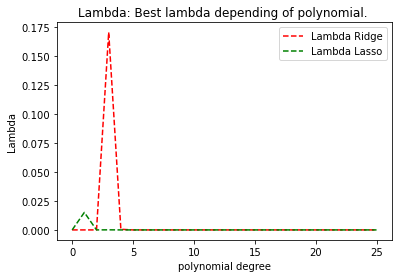

<Figure size 432x288 with 0 Axes>

In [113]:
np.random.seed(870) #comment out if one wants to generate different random noise each run
    
z = terrain2[::n, ::n] #Pick every Nth(25) point in terrain
x = np.linspace(0, 1, len(z[0]))
y = np.linspace(0, 1, len(z[:,0]))
x_mesh, y_mesh = np.meshgrid(x,y)

z = z.ravel()



numOfPoly_index = []
beta_index = []

numOfPoly_max = input("What is your desired polynomial max degree?:")
numOfPoly_max = int(numOfPoly_max) 

best_lambda_ridge = [None] * (numOfPoly_max +1)
best_lambda_lasso = [None] * (numOfPoly_max +1)
for poly in range(numOfPoly_max +1):
    print(poly)
    
    X = X_generator(x_mesh,y_mesh, poly)
    if poly>0:
        X = np.delete(X,0,1)
    X_train, X_test, z_train, z_test = traningDataGenerator(X,z)
    
    
    X_train, X_test,z_train, z_test = scale(X_train, X_test, z_train, z_test)
        
    best_lambda_lasso[poly],best_lambda_ridge[poly] = RidgeAndLasso(X_train,z_train,X_test,z_test,poly)   

plt.figure()
plt.plot(best_lambda_ridge, 'r--', label = 'Lambda Ridge')
plt.plot(best_lambda_lasso , 'g--', label = 'Lambda Lasso')
plt.title("Lambda: Best lambda depending of polynomial. ")
plt.xlabel('polynomial degree')
plt.ylabel('Lambda')
plt.legend()
plt.show()
plt.figure()
df_lambdas_real= pd.DataFrame({"Lasso_lambda":best_lambda_lasso,"Ridge_lambda":best_lambda_ridge})


In [128]:
print(df_lambdas_real.to_latex(index =True))


\begin{tabular}{lrr}
\toprule
{} &  Lasso\_lambda &  Ridge\_lambda \\
\midrule
0  &      0.000100 &      0.000100 \\
1  &      0.015199 &      0.000100 \\
2  &      0.000100 &      0.000100 \\
3  &      0.000175 &      0.170735 \\
4  &      0.000100 &      0.000643 \\
5  &      0.000100 &      0.000100 \\
6  &      0.000100 &      0.000100 \\
7  &      0.000100 &      0.000100 \\
8  &      0.000100 &      0.000100 \\
9  &      0.000100 &      0.000100 \\
10 &      0.000100 &      0.000100 \\
11 &      0.000100 &      0.000100 \\
12 &      0.000100 &      0.000100 \\
13 &      0.000100 &      0.000100 \\
14 &      0.000100 &      0.000100 \\
15 &      0.000100 &      0.000100 \\
16 &      0.000100 &      0.000100 \\
17 &      0.000100 &      0.000100 \\
18 &      0.000100 &      0.000100 \\
19 &      0.000100 &      0.000100 \\
20 &      0.000100 &      0.000100 \\
21 &      0.000100 &      0.000100 \\
22 &      0.000100 &      0.000100 \\
23 &      0.000100 &      0.000100 \\
24 &     

What is your desired polynomial max degree?:25
Degree: 0   mse: 1.042158   bias: 1.041526  variance: 0.000632
Degree: 1   mse: 0.750477   bias: 0.748436  variance: 0.002041
Degree: 2   mse: 0.534973   bias: 0.531386  variance: 0.003587
Degree: 3   mse: 0.515985   bias: 0.510721  variance: 0.005264
Degree: 4   mse: 0.436665   bias: 0.430308  variance: 0.006357
Degree: 5   mse: 0.386258   bias: 0.378232  variance: 0.008026
Degree: 6   mse: 0.359697   bias: 0.349627  variance: 0.010070
Degree: 7   mse: 0.357956   bias: 0.343353  variance: 0.014602
Degree: 8   mse: 0.367869   bias: 0.347875  variance: 0.019994
Degree: 9   mse: 0.343859   bias: 0.323180  variance: 0.020679
Degree: 10   mse: 0.325264   bias: 0.294710  variance: 0.030553
Degree: 11   mse: 0.333493   bias: 0.296991  variance: 0.036502
Degree: 12   mse: 0.349893   bias: 0.305276  variance: 0.044617
Degree: 13   mse: 0.355830   bias: 0.307829  variance: 0.048001
Degree: 14   mse: 0.364389   bias: 0.302967  variance: 0.061421
Deg

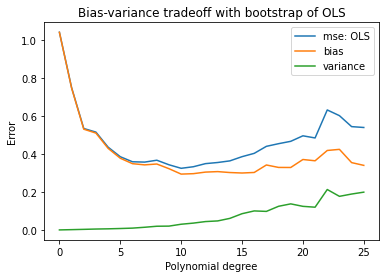

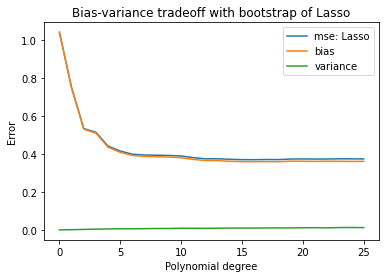

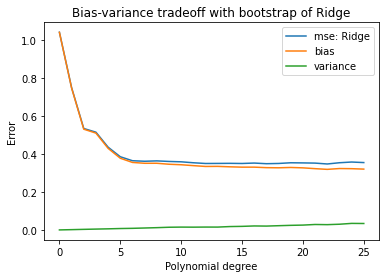

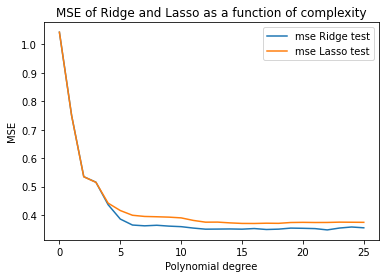

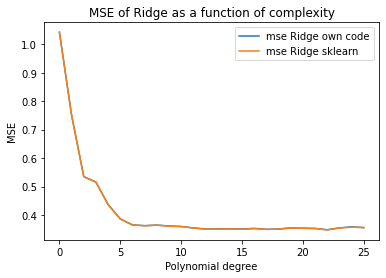

In [116]:
np.random.seed(870) #comment out if one wants to generate different random noise each run
    

z = terrain2[::n, ::n] #Pick every Nth(25) point in terrain
x = np.linspace(0, 1, len(z[0]))
y = np.linspace(0, 1, len(z[:,0]))
x_mesh, y_mesh = np.meshgrid(x,y)
z = z.ravel()
#creating lists
R2_test = []
R2_train = []

n_bootstraps = 100



numOfPoly_max = input("What is your desired polynomial max degree?:")
numOfPoly_max = int(numOfPoly_max) 

numOfPoly_index = np.zeros(numOfPoly_max + 1)
#bias varaiaance and mse
MSE_list = np.zeros(numOfPoly_max + 1 )
MSE_list_ridge = np.zeros(numOfPoly_max + 1 )
MSE_list_lasso = np.zeros(numOfPoly_max + 1 )
bias = np.zeros(numOfPoly_max + 1)
bias_ridge = np.zeros(numOfPoly_max + 1)
bias_lasso = np.zeros(numOfPoly_max + 1)
variance = np.zeros(numOfPoly_max + 1)
variance_ridge = np.zeros(numOfPoly_max + 1)
variance_lasso = np.zeros(numOfPoly_max + 1)
MSE_train = np.zeros(numOfPoly_max +1)
MSE_train_ridge = np.zeros(numOfPoly_max +1)
MSE_list_ridge_s = np.zeros(numOfPoly_max + 1) # The notation s is for sickit learn
MSE_train_lasso = np.zeros(numOfPoly_max +1)
lmb_ridge = best_lambda_ridge 
lmb_lasso = best_lambda_lasso
#for loop for number of polynomials
for poly in range(numOfPoly_max +1):
    
    i = poly
    X = X_generator(x_mesh,y_mesh, poly)
    
    if poly > 0: # Remove the intercept colum from the 
        X = np.delete(X,0,1)
    
    X_train, X_test, z_train, z_test = traningDataGenerator(X,z)
    poly_degree = int((poly+1)*(poly+2)/2) # Trenger en forklaring
    
    I = np.eye(poly_degree,poly_degree) 
    if poly > 0: # Fjerner intercept kolonnenn og første rad fra identitess matrisa For scaling
        I = np.eye(poly_degree-1,poly_degree-1)
        
    
    X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)

        
    #    
    z_pred = np.empty((z_test.shape[0], n_bootstraps))
    z_pred_ridge = np.empty((z_test.shape[0], n_bootstraps))
    z_pred_lasso = np.empty((z_test.shape[0], n_bootstraps))
    z_tilde = np.empty((z_train.shape[0], n_bootstraps))
    z_tilde_ridge = np.empty((z_train.shape[0], n_bootstraps))
    z_tilde_lasso = np.empty((z_train.shape[0], n_bootstraps))
    z_pred_ridge_s = np.empty((z_test.shape[0], n_bootstraps))
    for j in range(n_bootstraps):
        #Resampling data
        x_bs,z_bs = resample(X_train, z_train)
        
        #Caluclating the parameters beta for OLS and Ridge
        beta_ols = np.linalg.pinv(x_bs.T @ x_bs) @ x_bs.T @ z_bs
        beta_ridge = np.linalg.pinv(x_bs.T @ x_bs + lmb_ridge[i] * I) @ x_bs.T @ z_bs
        
        #Making predictions
        z_pred[:,j] = X_test @ beta_ols + np.mean(z_bs,axis = 0)
        z_tilde[:,j] = X_train @ beta_ols + np.mean(z_bs, axis = 0)
        z_pred_ridge[:,j] = X_test @ beta_ridge + np.mean(z_bs, axis = 0)
        
        z_tilde_ridge[:,j] = X_train @ beta_ridge + np.mean(z_bs, axis = 0)
        
        #validating that right usage of sickit learn
        Ridge_model = linear_model.Ridge(lmb_ridge[i],fit_intercept = True)
        Ridge_model.fit(x_bs,z_bs)
        z_pred_ridge_s[:,j] = Ridge_model.predict(X_test)
        
        #Same for lasso
        RegLasso = linear_model.Lasso(lmb_lasso[i],max_iter=1e5, tol=0.1,fit_intercept = True)
        RegLasso.fit(x_bs,z_bs)
        z_pred_lasso[:,j] = RegLasso.predict(X_test)
        z_tilde_lasso[:,j] = RegLasso.predict(X_train)
    
    #Computing Score lists, for analysing bias variance trade off
    #MSE`s
    MSE_list[poly] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred)**2, axis=1, keepdims=True))
    MSE_list_ridge[poly] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_ridge)**2, axis=1, keepdims=True))
    MSE_list_lasso[poly] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_lasso)**2, axis=1, keepdims=True))
    MSE_list_ridge_s[poly] =  np.mean(np.mean((z_test.reshape(-1,1) - z_pred_ridge_s)**2, axis=1, keepdims=True))
    
    #Biases
    bias[poly] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred, axis=1, keepdims=True))**2)
    bias_ridge[poly] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_ridge, axis=1, keepdims=True))**2)
    bias_lasso[poly] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_lasso, axis=1, keepdims=True))**2)
    
    #Variances
    variance[poly] = np.mean(np.var(z_pred, axis=1, keepdims=True))
    variance_ridge[poly] = np.mean(np.var(z_pred_ridge, axis=1, keepdims=True))
    variance_lasso[poly] = np.mean(np.var(z_pred_lasso, axis=1, keepdims=True))
    


    numOfPoly_index[poly] = poly


    #Printing each itteration
    print('Degree: %i   mse: %.6f   bias: %.6f  variance: %.6f'\
        %(poly, MSE_list[poly], bias[poly], variance[poly]))
    
#Plotting
plt.plot(numOfPoly_index, MSE_list, label='mse: OLS')
plt.plot(numOfPoly_index, bias, label='bias')
plt.plot(numOfPoly_index, variance, label='variance')
plt.title("Bias-variance tradeoff with bootstrap of OLS")
plt.xlabel('Polynomial degree')
plt.ylabel('Error')
#plt.ylim(0,0.9)
plt.legend()
plt.show()

plt.plot(numOfPoly_index, MSE_list_lasso, label='mse: Lasso')
plt.plot(numOfPoly_index, bias_lasso, label='bias')
plt.plot(numOfPoly_index, variance_lasso, label='variance')
plt.title("Bias-variance tradeoff with bootstrap of Lasso")
plt.xlabel('Polynomial degree')
plt.ylabel('Error')
#plt.ylim(0,0.5)
plt.legend()
plt.show()

plt.plot(numOfPoly_index, MSE_list_ridge, label='mse: Ridge')
plt.plot(numOfPoly_index, bias_ridge, label='bias')
plt.plot(numOfPoly_index, variance_ridge, label='variance')
plt.title("Bias-variance tradeoff with bootstrap of Ridge")
plt.xlabel('Polynomial degree')
plt.ylabel('Error')
#plt.ylim(0,0.5)
plt.legend()
plt.show()



plt.plot(numOfPoly_index, MSE_list_ridge, label='mse Ridge test')
plt.plot(numOfPoly_index, MSE_list_lasso, label='mse Lasso test')
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.title("MSE of Ridge and Lasso as a function of complexity")
plt.show()

plt.plot(numOfPoly_index, MSE_list_ridge, label='mse Ridge own code')
plt.plot(numOfPoly_index, MSE_list_ridge_s, label='mse Ridge sklearn')
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
#plt.ylim(0,0.5)
plt.title("MSE of Ridge as a function of complexity")
plt.show()

df_bootstrap_real = pd.DataFrame({"MSE_OLS":MSE_list,"MSE_Ridge":MSE_list_ridge,"MSE_Lasso":MSE_list_lasso,\
                  "Bias_OLS":bias,"Bias_Ridge":bias_ridge,"Bias_Lasso":bias_lasso,\
                  "Var_OLS":variance,"Var_Ridge":variance_ridge,"Var_Lasso":variance_lasso})
df_bootstrap_real.index.name = "polynomial degree"

In [189]:
print(df_bootstrap_real.to_latex(index = False))
print(df_bootstrap_real.describe())

\begin{tabular}{rrrrrrrrr}
\toprule
 MSE\_OLS &  MSE\_Ridge &  MSE\_Lasso &  Bias\_OLS &  Bias\_Ridge &  Bias\_Lasso &  Var\_OLS &  Var\_Ridge &  Var\_Lasso \\
1.042158 &   1.042158 &   1.042158 &  1.041526 &    1.041526 &    1.041526 & 0.000632 &   0.000632 &   0.000632 \\
\midrule
0.750477 &   0.750477 &   0.749894 &  0.748436 &    0.748436 &    0.748011 & 0.002041 &   0.002041 &   0.001884 \\
0.534973 &   0.534973 &   0.534743 &  0.531386 &    0.531386 &    0.531539 & 0.003587 &   0.003587 &   0.003204 \\
0.515985 &   0.515594 &   0.515035 &  0.510721 &    0.510608 &    0.510344 & 0.005264 &   0.004986 &   0.004691 \\
0.436665 &   0.436598 &   0.442056 &  0.430308 &    0.430278 &    0.436194 & 0.006357 &   0.006320 &   0.005862 \\
0.386258 &   0.386184 &   0.416112 &  0.378232 &    0.378243 &    0.409321 & 0.008026 &   0.007941 &   0.006791 \\
0.359697 &   0.365179 &   0.399487 &  0.349627 &    0.356191 &    0.392839 & 0.010070 &   0.008987 &   0.006648 \\
0.357956 &   0.362418 &   

enter the max degree:25
max degree is : 25
Eureka


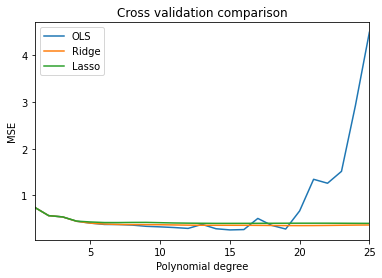

In [117]:
np.random.seed(870)
z = terrain2[::n, ::n] #Pick every (25th) point in terrain2
x = np.linspace(0, 1, len(z[0]))
y = np.linspace(0, 1, len(z[:,0]))
x_mesh, y_mesh = np.meshgrid(x,y)
z = z.ravel()

max_degree = input("enter the max degree:")
max_degree = int(max_degree)
print("max degree is :",max_degree)


degree_list = np.zeros(max_degree +1)

lmb_ridge = best_lambda_ridge
lmb_lasso = best_lambda_lasso
k = 10 #Number of folds
kfold = KFold(n_splits = k, shuffle=True, random_state=22) 

#Error Lists:
mse_Ridge_cval = np.zeros(max_degree + 1)
mse_OLS_cval = np.zeros(max_degree + 1)
mse_Lasso_cval = np.zeros(max_degree + 1)

for degree in range(0,max_degree + 1):
    degree_list[degree] = degree
    X = X_generator(x_mesh,y_mesh, degree)
    if degree > 0:
        X = np.delete(X,0,1)
    mse_OLS_split = np.zeros(k)
    mse_Ridge_split = np.zeros(k)
    mse_Lasso_split = np.zeros(k)
    cv_split = 0
    
    
    for train_ind, test_ind in kfold.split(X):
        X_train = X[train_ind]
        X_test = X[test_ind]
        z_train = z[train_ind]
        z_test = z[test_ind]
        
        X_train, X_test, z_train, z_test = scale(X_train, X_test,z_train,z_test)
    
        #Creating models
        OLS_model = linear_model.LinearRegression(fit_intercept = True)
        OLS_model.fit(X_train, z_train)
        
        Ridge_model = linear_model.Ridge(lmb_ridge[degree],fit_intercept = True)
        Ridge_model.fit(X_train,z_train)
    
        Lasso_model = linear_model.Lasso(lmb_lasso[degree],max_iter=1e5, tol=0.1,fit_intercept = True)
        Lasso_model.fit(X_train,z_train)
    
        #Predicting 
        z_pred_ols = OLS_model.predict(X_test)
        z_pred_ridge = Ridge_model.predict(X_test)
        z_pred_lasso = Lasso_model.predict(X_test)
    
        #Calculating MSE for each fold
        mse_OLS_split[cv_split] = mean_squared_error(z_test, z_pred_ols)
        mse_Ridge_split[cv_split] = mean_squared_error(z_test, z_pred_ridge)
        mse_Lasso_split[cv_split] = mean_squared_error(z_test, z_pred_lasso)
        
        cv_split += 1
    
    mse_Ridge_cval[degree] = np.mean(mse_Ridge_split)
    mse_OLS_cval[degree] = np.mean(mse_OLS_split)
    mse_Lasso_cval[degree] = np.mean(mse_Lasso_split)

    
print("Eureka")

data = pd.DataFrame(columns =( ['mse_OLS', 'mse_ridge', 'mse_lasso']))

df_CVal = pd.DataFrame({"mse_cval_OLS":mse_OLS_cval,"mse_cval_Ridge":mse_Ridge_cval,"mse_cval_Lasso":mse_Lasso_cval}, index= degree_list)
df_CVal.index.name = "polynomial degree"
    
    
plt.plot(degree_list, mse_OLS_cval, label = "OLS")
plt.plot(degree_list, mse_Ridge_cval , label = "Ridge")
plt.plot(degree_list, mse_Lasso_cval, label = "Lasso")
plt.legend()

plt.xlim(0.99,degree)
plt.title("Cross validation comparison")
plt.ylabel("MSE")
plt.xlabel("Polynomial degree")
plt.show()    





In [190]:
print(df_CVal.to_latex(index = True))
print(df_CVal.describe())

\begin{tabular}{lrrr}
\toprule
{} &  mse\_cval\_OLS &  mse\_cval\_Ridge &  mse\_cval\_Lasso \\
polynomial degree &               &                 &                 \\
\midrule
0.0               &      1.002413 &        1.002413 &        1.002413 \\
1.0               &      0.745855 &        0.745855 &        0.746329 \\
2.0               &      0.568951 &        0.568951 &        0.568945 \\
3.0               &      0.541883 &        0.541781 &        0.542086 \\
4.0               &      0.448969 &        0.448877 &        0.452040 \\
5.0               &      0.408915 &        0.408776 &        0.433817 \\
6.0               &      0.380902 &        0.389544 &        0.421615 \\
7.0               &      0.378592 &        0.380729 &        0.421202 \\
8.0               &      0.366699 &        0.378180 &        0.424128 \\
9.0               &      0.340770 &        0.376964 &        0.424715 \\
10.0              &      0.329017 &        0.374387 &        0.418470 \\
11.0              & 

# running a cross validation on another part of the map to see if the results yield simular features Running for 10 polynomials

40
40
What is your desired polynomial max degree?:10
0
1
2
3
4
5
6
7
8
9
10


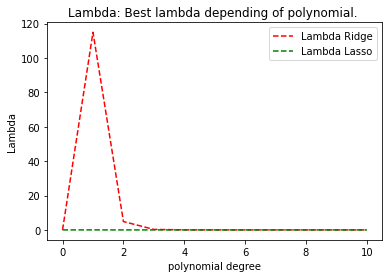

<Figure size 432x288 with 0 Axes>

In [194]:
terrain3 = terrain[1500:2500,:1000] # running a cross validation on another part of the map to see if it yields the same resluts

z = terrain3[::n,::n] #Pick every Nth(25) point in terrain
x = np.linspace(0, 1, len(z[0,:]))
print(len(x))
y = np.linspace(0, 1, len(z[:,0]))
print(len(y))
x_mesh, y_mesh = np.meshgrid(x,y)
z = z.ravel()
numOfPoly_max = input("What is your desired polynomial max degree?:")
numOfPoly_max = int(numOfPoly_max) 

best_lambda_ridge = [None] * (numOfPoly_max +1)
best_lambda_lasso = [None] * (numOfPoly_max +1)
for poly in range(numOfPoly_max +1):
    print(poly)
    
    X = X_generator(x_mesh,y_mesh, poly)
    if poly>0:
        X = np.delete(X,0,1)
    X_train, X_test, z_train, z_test = traningDataGenerator(X,z)
    
    
    X_train, X_test,z_train, z_test = scale(X_train, X_test, z_train, z_test)
        
    best_lambda_lasso[poly],best_lambda_ridge[poly] = RidgeAndLasso(X_train,z_train,X_test,z_test,poly)   

plt.figure()
plt.plot(best_lambda_ridge, 'r--', label = 'Lambda Ridge')
plt.plot(best_lambda_lasso , 'g--', label = 'Lambda Lasso')
plt.title("Lambda: Best lambda depending of polynomial. ")
plt.xlabel('polynomial degree')
plt.ylabel('Lambda')
plt.legend()
plt.show()
plt.figure()
df_lambdas_real= pd.DataFrame({"Lasso_lambda":best_lambda_lasso,"Ridge_lambda":best_lambda_ridge})

40
40


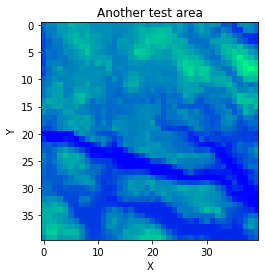

enter the max degree:10
max degree is : 10
Eureka


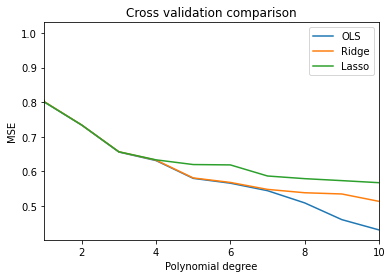

In [196]:
terrain3 = terrain[1500:2500,:1000] # running a cross validation on another part of the map to see if it yields the same resluts

z = terrain3[::n,::n] #Pick every Nth(25) point in terrain
x = np.linspace(0, 1, len(z[0,:]))
print(len(x))
y = np.linspace(0, 1, len(z[:,0]))
print(len(y))
x_mesh, y_mesh = np.meshgrid(x,y)

plt.figure()
plt.title('Another test area')
plt.imshow(z, cmap='winter')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
z = z.ravel()

max_degree = input("enter the max degree:")
max_degree = int(max_degree)
print("max degree is :",max_degree)


degree_list = np.zeros(max_degree +1)

lmb_ridge = best_lambda_ridge
lmb_lasso = best_lambda_lasso
k = 10 #Number of folds
kfold = KFold(n_splits = k, shuffle=True, random_state=22) 

#Error Lists:
mse_Ridge_cval = np.zeros(max_degree + 1)
mse_OLS_cval = np.zeros(max_degree + 1)
mse_Lasso_cval = np.zeros(max_degree + 1)

for degree in range(0,max_degree + 1):
    degree_list[degree] = degree
    X = X_generator(x_mesh,y_mesh, degree)
    if degree > 0:
        X = np.delete(X,0,1)
    mse_OLS_split = np.zeros(k)
    mse_Ridge_split = np.zeros(k)
    mse_Lasso_split = np.zeros(k)
    cv_split = 0
    
    
    for train_ind, test_ind in kfold.split(X):
        X_train = X[train_ind]
        X_test = X[test_ind]
        z_train = z[train_ind]
        z_test = z[test_ind]
        
        X_train, X_test, z_train, z_test = scale(X_train, X_test,z_train,z_test)
    
        #Creating models
        OLS_model = linear_model.LinearRegression(fit_intercept = True)
        OLS_model.fit(X_train, z_train)
        
        Ridge_model = linear_model.Ridge(lmb_ridge[degree],fit_intercept = True)
        Ridge_model.fit(X_train,z_train)
    
        Lasso_model = linear_model.Lasso(lmb_lasso[degree],max_iter=1e5, tol=0.1,fit_intercept = True)
        Lasso_model.fit(X_train,z_train)
    
        #Predicting 
        z_pred_ols = OLS_model.predict(X_test)
        z_pred_ridge = Ridge_model.predict(X_test)
        z_pred_lasso = Lasso_model.predict(X_test)
    
        #Calculating MSE for each fold
        mse_OLS_split[cv_split] = mean_squared_error(z_test, z_pred_ols)
        mse_Ridge_split[cv_split] = mean_squared_error(z_test, z_pred_ridge)
        mse_Lasso_split[cv_split] = mean_squared_error(z_test, z_pred_lasso)
        
        cv_split += 1
    
    mse_Ridge_cval[degree] = np.mean(mse_Ridge_split)
    mse_OLS_cval[degree] = np.mean(mse_OLS_split)
    mse_Lasso_cval[degree] = np.mean(mse_Lasso_split)

    
print("Eureka")

data = pd.DataFrame(columns =( ['mse_OLS', 'mse_ridge', 'mse_lasso']))

df_CVal = pd.DataFrame({"mse_cval_OLS":mse_OLS_cval,"mse_cval_Ridge":mse_Ridge_cval,"mse_cval_Lasso":mse_Lasso_cval}, index= degree_list)
df_CVal.index.name = "polynomial degree"
    
    
plt.plot(degree_list, mse_OLS_cval, label = "OLS")
plt.plot(degree_list, mse_Ridge_cval , label = "Ridge")
plt.plot(degree_list, mse_Lasso_cval, label = "Lasso")
plt.legend()

plt.xlim(0.99,degree)
plt.title("Cross validation comparison")
plt.ylabel("MSE")
plt.xlabel("Polynomial degree")
plt.show()    



